# Estructura Estelar

## Ejercicio: Energía Potencial Gravitacional del Sol

**(a)** Con base en el modelo solar estándar de Christensen-Dalsgaard, calcule el valor absoluto de la energía potencial gravitacional del Sol.


Para una distribución de materia con simetría esférica, podemos calcular su energía potencial gravitacional mediante la suma de las contribuciones a la misma de todos los cascarones esféricos desde el origen hasta el radio de la configuración:

$$
\Omega_* = - \int_0^{R_*} \frac{G M(r) \, dM(r)}{r}
$$

en donde \( R_* \) es el radio de la configuración.

Considerando la masa y el volumen del cascaron como:

$$
dM(r) = 4\pi r^2 \rho(r) \, dr
$$

Esto se debe a que el volumen de un cascarón de espesor \( dr \) es 

$$
dV = 4\pi r^2 dr,
$$

y la masa es densidad por volumen.

Remplazando  se tiene que la integral se puede reescribir, en términos de sumas  como:

$$
U \approx -G \sum 4\pi r_i \rho_i M(r_i) \Delta r_i
$$




In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes en CGS
G = 6.67430e-8  # cm^3 g^-1 s^-2
R_sun = 6.96e10  # Radio solar en cm

# Cargar y ordenar datos
data = np.loadtxt("cptrho-l5bi-d-15c.txt", comments="#")
data = data[data[:, 0].argsort()]  # ordenar por r/R

# Extraer columnas
r_over_R = data[:, 0]
rho = data[:, 2]  # g/cm^3

#radios reales multiplicados por el radio solar 
r = r_over_R*R_sun 

# Calcular diferencia de radios 
dr = np.gradient(r)

M_r = np.zeros_like(r)

Semilla = 0.000001  # radio semilla  en el centro de la estrella
M_r[0] = (4/3) * np.pi * Semilla**3 * rho[0]

# Sumar cascarones esféricos de masa diferencial dr
for i in range(1, len(r)):
    dir_volume = 4 * np.pi * r[i - 1]**2 * dr[i - 1]
    M_r[i] = M_r[i - 1] + rho[i - 1] * dir_volume

print(f"Radio: {r[i]:.3e} cm, Masa acumulada: {M_r[i]:.3e} g")

# Calcular integrando y energía potencial
integrando = M_r * rho * r
Omega = -4 * np.pi * G * np.sum(integrando * dr)

print(f"Energía potencial gravitacional: {Omega:.3e} erg")

Radio: 6.965e+10 cm, Masa acumulada: 1.989e+33 g
Energía potencial gravitacional: -6.109e+48 erg


**(b)** Calcule la siguiente relación:

$$
\frac{G M_\odot^2}{R_\odot}
$$

In [62]:
R_sun = 6.96e10  # Radio solar en cm
m_sun = 1.989e33  # Masa solar en g
G = 6.67430e-8  # cm^3 g^-1 s^-2
# Energía potencial gravitacional en unidades solares
Omega_solar = G * m_sun**2 / R_sun
print(f"Potencial gravitacional en la superficie del sol: {Omega_solar:.3e} erg ")

Potencial gravitacional en la superficie del sol: 3.794e+48 erg 


**(c)** Sea $ -\Omega_\odot $ el valor absoluto de la energía potencial gravitacional del Sol calculada en el paso (a). 
Hallar el valor del número real positivo $ q $ definido mediante:

$$
-\Omega_\odot = q \cdot \frac{G M_\odot^2}{R_\odot}
$$

In [65]:
print(f"El valor de q es: {-Omega/Omega_solar:.5f}")

El valor de q es: 1.61019


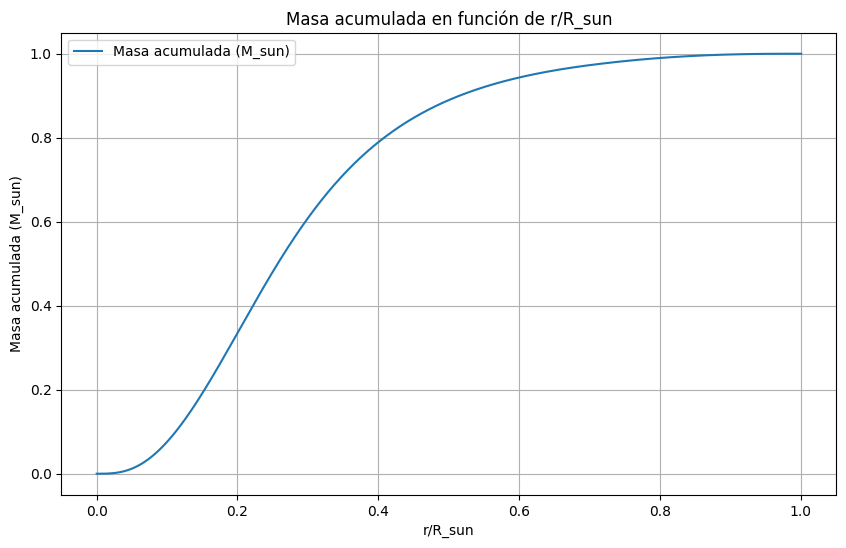

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(r_over_R, M_r / m_sun, label="Masa acumulada (M_sun)")
plt.xlabel("r/R_sun")
plt.ylabel("Masa acumulada (M_sun)")
plt.title("Masa acumulada en función de r/R_sun")
plt.grid()
plt.legend()